# MetaboliQ AI
## ~ by Mavericks
### Functionality 3
This Jupyter Notebook contains the *Random Forest Classifier Model* for the third functionality of the MetaboliQ AI.  
Problem Statement: To classify the type of diabetes based on the medical reports of a patient.  
Developed for:  
1. Doctors  
2. Nurses  
3. Trained Professionals  
4. Laboratory Professionals
   
Output: Predicts the type of diabetes given the medical reports.

## Importing the required libraries

For this model, we have used the sklearnex (Extension for Scikit-Learn) module by intel.  
Details: https://github.com/oneapi-src/oneAPI-samples

In [186]:
import time
start_time = time.time()

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [188]:
data = pd.read_csv("diabetes_dataset00.csv")
data.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


# Exploratory Data Analysis

In [189]:
data.shape

(70000, 34)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [191]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin Levels,70000.0,21.607443,10.785852,5.0,13.0,19.0,28.00,49.0
Age,70000.0,32.020700,21.043173,0.0,14.0,31.0,49.00,79.0
BMI,70000.0,24.782943,6.014236,12.0,20.0,25.0,29.00,39.0
Blood Pressure,70000.0,111.339543,19.945000,60.0,99.0,113.0,125.00,149.0
Cholesterol Levels,70000.0,194.867200,44.532466,100.0,163.0,191.0,225.00,299.0
Waist Circumference,70000.0,35.051657,6.803461,20.0,30.0,34.0,39.00,54.0
Blood Glucose Levels,70000.0,160.701657,48.165547,80.0,121.0,152.0,194.00,299.0
Weight Gain During Pregnancy,70000.0,15.496414,9.633096,0.0,7.0,16.0,22.00,39.0
Pancreatic Health,70000.0,47.564243,19.984683,10.0,32.0,46.0,64.00,99.0
Pulmonary Function,70000.0,70.264671,11.965600,30.0,63.0,72.0,79.00,89.0


In [192]:
data.isnull().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

In [193]:
data.nunique()

Target                             13
Genetic Markers                     2
Autoantibodies                      2
Family History                      2
Environmental Factors               2
Insulin Levels                     45
Age                                80
BMI                                28
Physical Activity                   3
Dietary Habits                      2
Blood Pressure                     90
Cholesterol Levels                200
Waist Circumference                35
Blood Glucose Levels              220
Ethnicity                           2
Socioeconomic Factors               3
Smoking Status                      2
Alcohol Consumption                 3
Glucose Tolerance Test              2
History of PCOS                     2
Previous Gestational Diabetes       2
Pregnancy History                   2
Weight Gain During Pregnancy       40
Pancreatic Health                  90
Pulmonary Function                 60
Cystic Fibrosis Diagnosis           2
Steroid Use 

In [194]:
data["Target"].value_counts()

Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

# Statistical Analysis

In [195]:
data.select_dtypes(include='int').mean()

Insulin Levels                    21.607443
Age                               32.020700
BMI                               24.782943
Blood Pressure                   111.339543
Cholesterol Levels               194.867200
Waist Circumference               35.051657
Blood Glucose Levels             160.701657
Weight Gain During Pregnancy      15.496414
Pancreatic Health                 47.564243
Pulmonary Function                70.264671
Neurological Assessments           1.804157
Digestive Enzyme Levels           46.420529
Birth Weight                    3097.061071
dtype: float64

In [196]:
data.select_dtypes(include='int').median()

Insulin Levels                    19.0
Age                               31.0
BMI                               25.0
Blood Pressure                   113.0
Cholesterol Levels               191.0
Waist Circumference               34.0
Blood Glucose Levels             152.0
Weight Gain During Pregnancy      16.0
Pancreatic Health                 46.0
Pulmonary Function                72.0
Neurological Assessments           2.0
Digestive Enzyme Levels           48.0
Birth Weight                    3103.0
dtype: float64

In [197]:
data.select_dtypes(include='int').var()

Insulin Levels                     116.334604
Age                                442.815140
BMI                                 36.171031
Blood Pressure                     397.803022
Cholesterol Levels                1983.140552
Waist Circumference                 46.287078
Blood Glucose Levels              2319.919962
Weight Gain During Pregnancy        92.796541
Pancreatic Health                  399.387550
Pulmonary Function                 143.175580
Neurological Assessments             0.462609
Digestive Enzyme Levels            376.014342
Birth Weight                    509563.691452
dtype: float64

In [198]:
data.select_dtypes(include='int').std()

Insulin Levels                   10.785852
Age                              21.043173
BMI                               6.014236
Blood Pressure                   19.945000
Cholesterol Levels               44.532466
Waist Circumference               6.803461
Blood Glucose Levels             48.165547
Weight Gain During Pregnancy      9.633096
Pancreatic Health                19.984683
Pulmonary Function               11.965600
Neurological Assessments          0.680154
Digestive Enzyme Levels          19.391089
Birth Weight                    713.837300
dtype: float64

In [199]:
data.select_dtypes(include='int').cov()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
Insulin Levels,116.334604,138.026012,34.642745,125.162135,265.085055,42.605658,53.146200,53.008885,63.699493,15.878668,3.019664,83.328815,3051.613540
Age,138.026012,442.815140,83.908020,320.402806,684.485513,105.031631,28.033505,141.589561,187.018720,65.962921,6.908295,237.360857,7864.516500
BMI,34.642745,83.908020,36.171031,78.450935,161.523739,25.399604,-13.754025,34.098166,46.469223,16.789817,1.525170,60.997293,2044.870126
Blood Pressure,125.162135,320.402806,78.450935,397.803022,599.093878,96.687813,11.454978,128.131219,174.838656,61.880660,5.979782,223.307988,7676.107622
Cholesterol Levels,265.085055,684.485513,161.523739,599.093878,1983.140552,203.768700,-80.769831,297.060982,367.980817,148.087050,14.468656,483.522954,16632.812936
Waist Circumference,42.605658,105.031631,25.399604,96.687813,203.768700,46.287078,30.426789,40.776296,50.548061,14.712238,2.198991,64.341824,2316.372465
Blood Glucose Levels,53.146200,28.033505,-13.754025,11.454978,-80.769831,30.426789,2319.919962,-66.014184,-299.886661,-344.369085,8.595552,-314.642719,-10157.779405
Weight Gain During Pregnancy,53.008885,141.589561,34.098166,128.131219,297.060982,40.776296,-66.014184,92.796541,89.466037,40.356047,2.777159,119.418250,3924.955611
Pancreatic Health,63.699493,187.018720,46.469223,174.838656,367.980817,50.548061,-299.886661,89.466037,399.387550,100.836802,2.109719,194.483141,6444.963983
Pulmonary Function,15.878668,65.962921,16.789817,61.880660,148.087050,14.712238,-344.369085,40.356047,100.836802,143.175580,-0.268127,105.845810,3774.980850


In [200]:
data.select_dtypes(include='int').corr()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
Insulin Levels,1.000000,0.608128,0.534044,0.581814,0.551892,0.580608,0.102301,0.510186,0.295518,0.123034,0.411620,0.398418,0.396347
Age,0.608128,1.000000,0.662997,0.763398,0.730426,0.733633,0.027659,0.698480,0.444710,0.261972,0.482672,0.581695,0.523554
BMI,0.534044,0.662997,1.000000,0.654009,0.603086,0.620750,-0.047480,0.588552,0.386623,0.233309,0.372847,0.523032,0.476306
Blood Pressure,0.581814,0.763398,0.654009,1.000000,0.674503,0.712538,0.011924,0.666891,0.438638,0.259290,0.440803,0.577388,0.539148
Cholesterol Levels,0.551892,0.730426,0.603086,0.674503,1.000000,0.672560,-0.037656,0.692473,0.413477,0.277911,0.477688,0.559936,0.523226
Waist Circumference,0.580608,0.733633,0.620750,0.712538,0.672560,1.000000,0.092852,0.622174,0.371773,0.180723,0.475211,0.487710,0.476957
Blood Glucose Levels,0.102301,0.027659,-0.047480,0.011924,-0.037656,0.092852,1.000000,-0.142277,-0.311547,-0.597521,0.262380,-0.336883,-0.295436
Weight Gain During Pregnancy,0.510186,0.698480,0.588552,0.666891,0.692473,0.622174,-0.142277,1.000000,0.464724,0.350113,0.423865,0.639297,0.570781
Pancreatic Health,0.295518,0.444710,0.386623,0.438638,0.413477,0.371773,-0.311547,0.464724,1.000000,0.421684,0.155210,0.501860,0.451777
Pulmonary Function,0.123034,0.261972,0.233309,0.259290,0.277911,0.180723,-0.597521,0.350113,0.421684,1.000000,-0.032946,0.456181,0.441958


# Outlier Detection and Removal

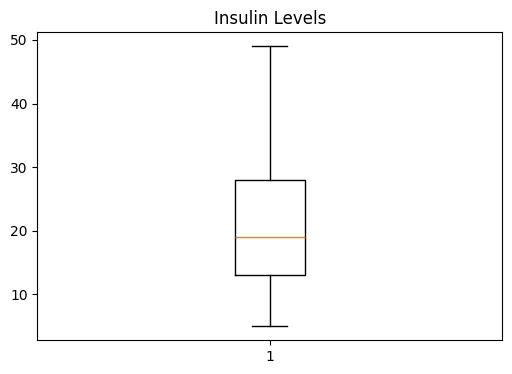

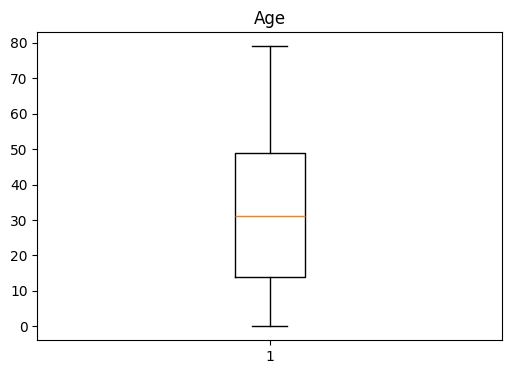

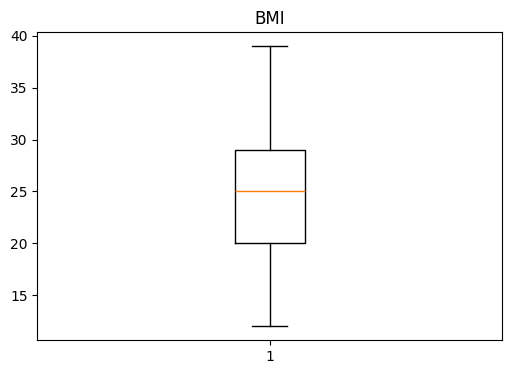

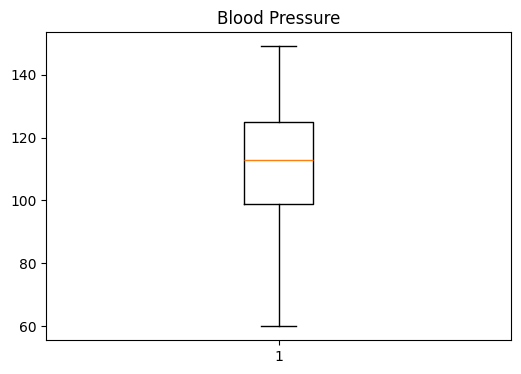

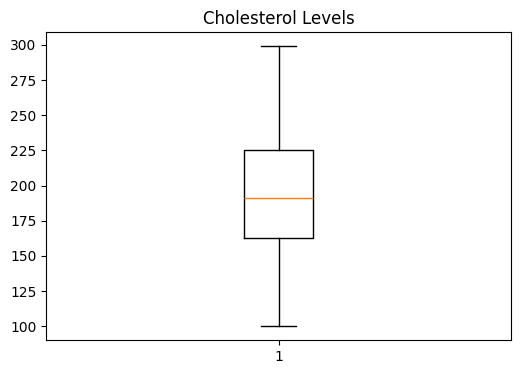

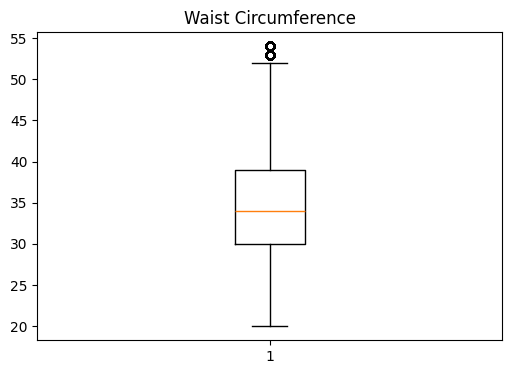

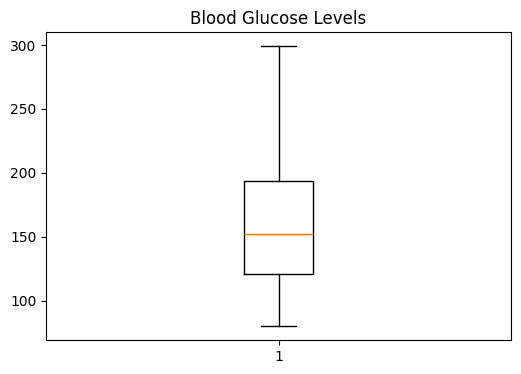

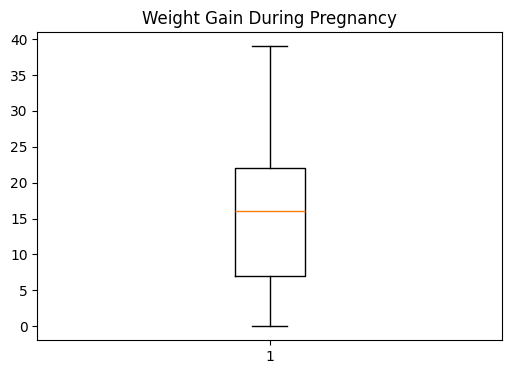

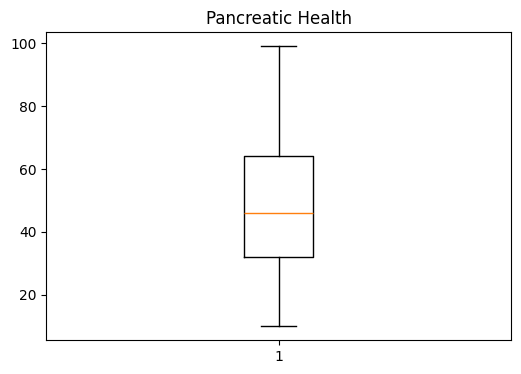

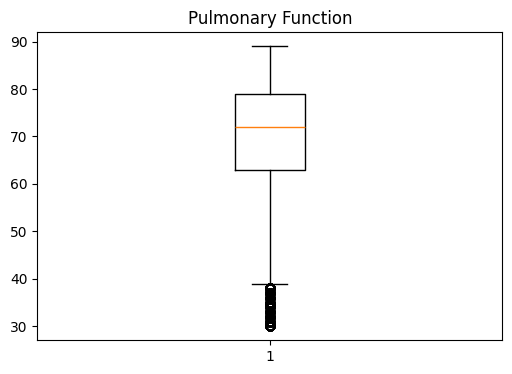

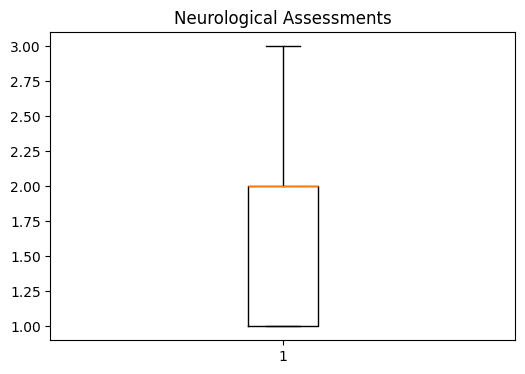

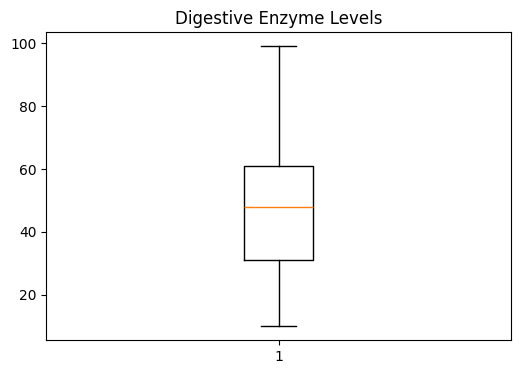

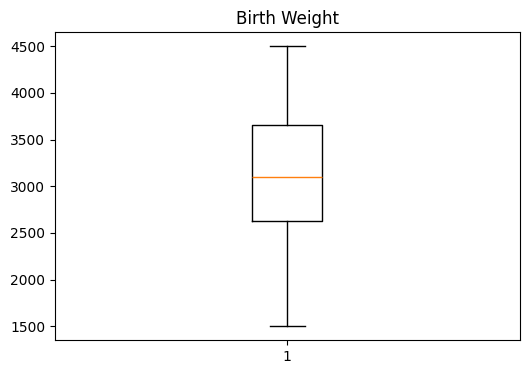

<Figure size 640x480 with 0 Axes>

In [201]:
for col in data.select_dtypes('int').columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()
plt.tight_layout()

In [202]:
Q1 = np.percentile(data.select_dtypes('int'), 25)
Q3 = np.percentile(data.select_dtypes('int'), 75)
IQR = Q3 - Q1

# Calculate Quartile Deviation
quartile_deviation = (Q3 - Q1) / 2

print("Interquartile Range (IQR):", IQR)
print("Quartile Deviation:", quartile_deviation)

Interquartile Range (IQR): 93.0
Quartile Deviation: 46.5


Hence, no problematic outliers are present.

# Data Visualization

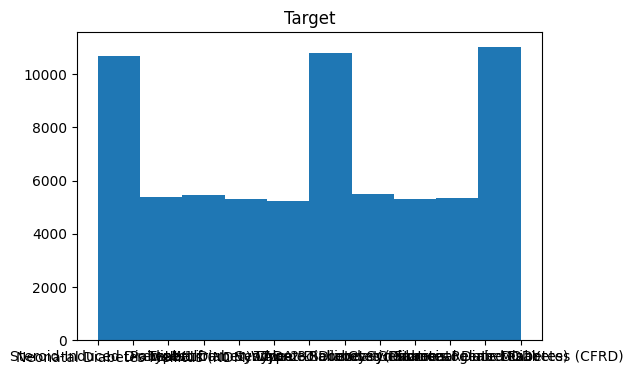

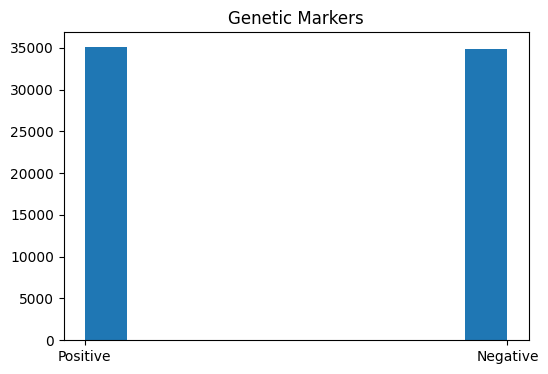

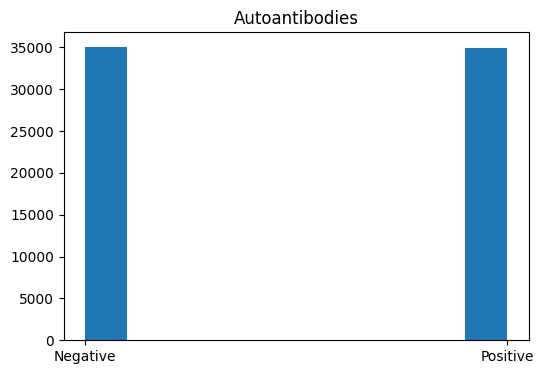

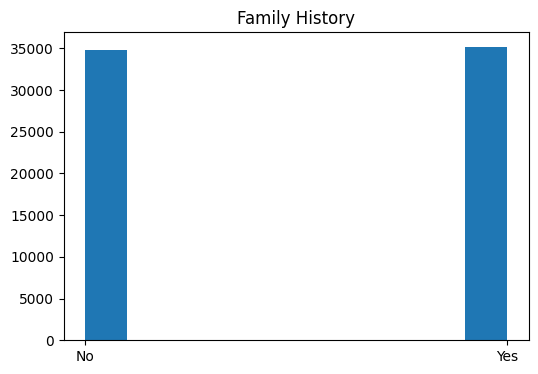

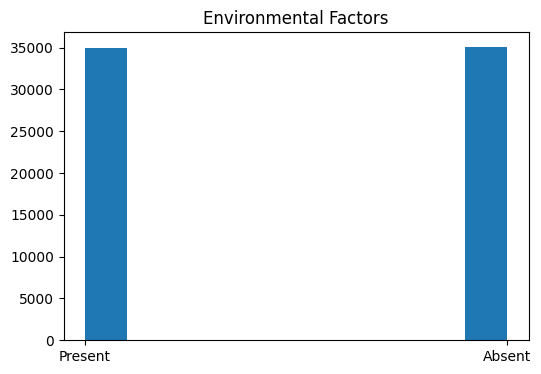

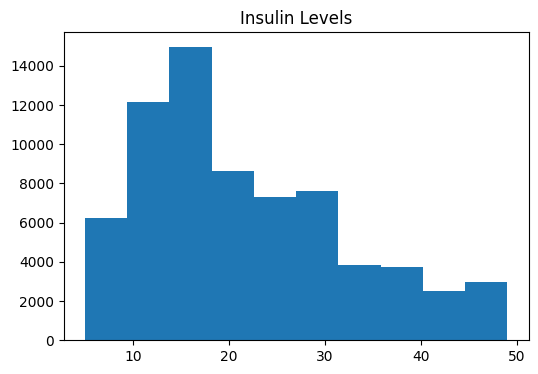

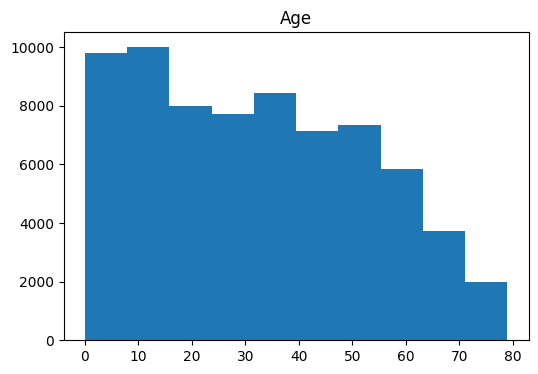

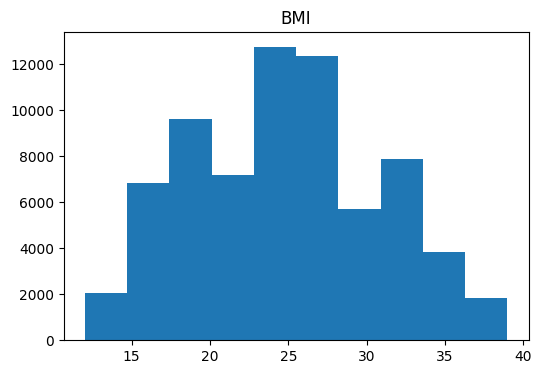

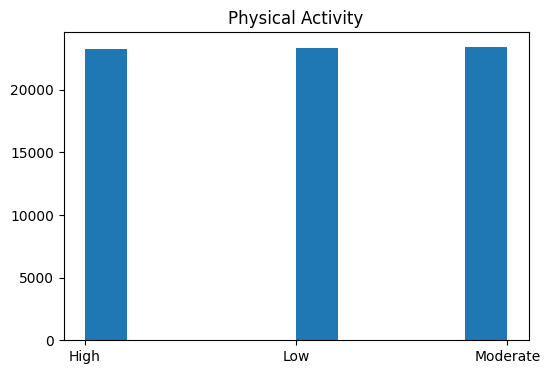

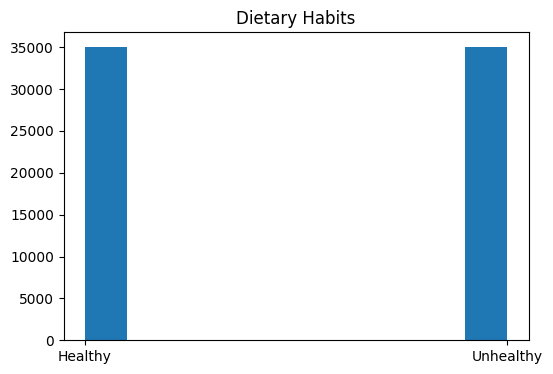

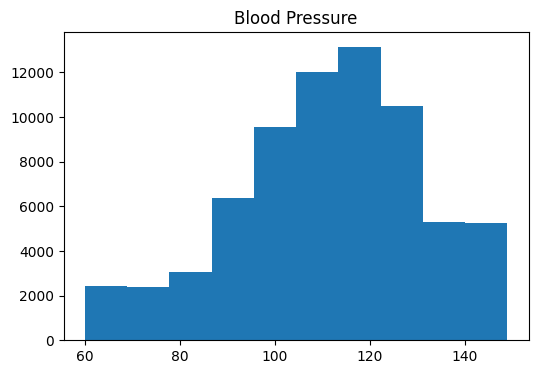

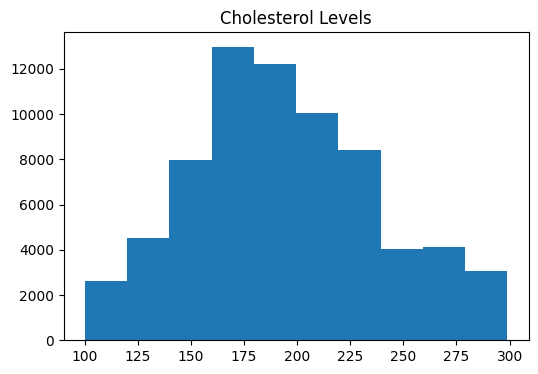

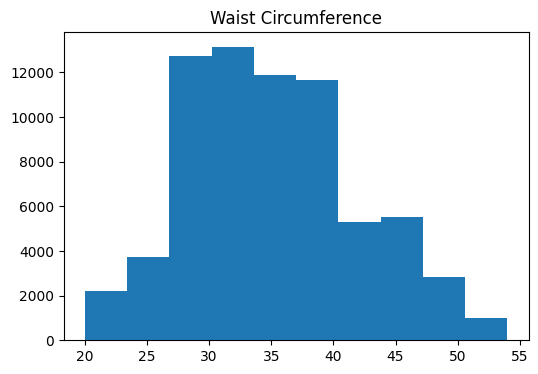

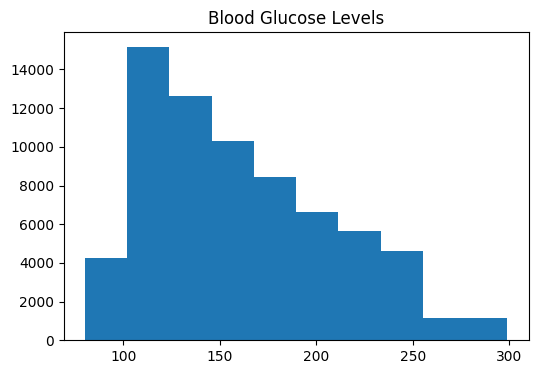

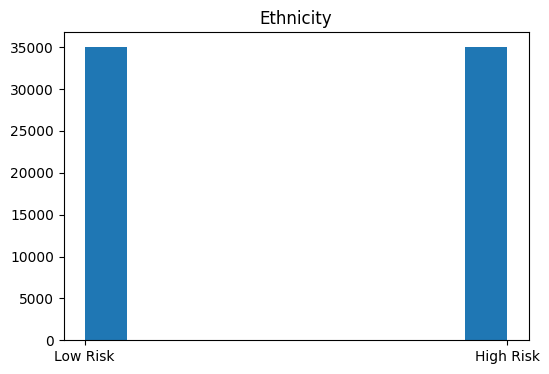

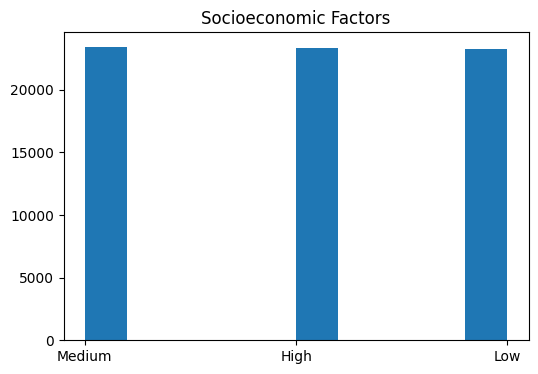

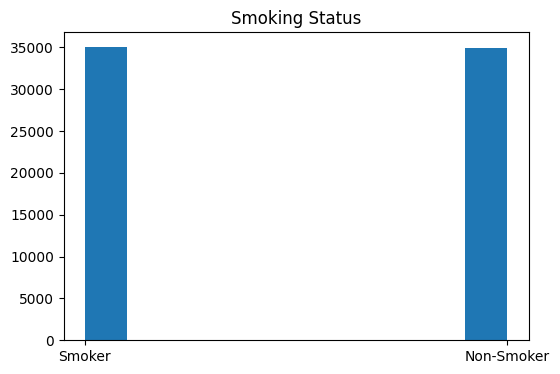

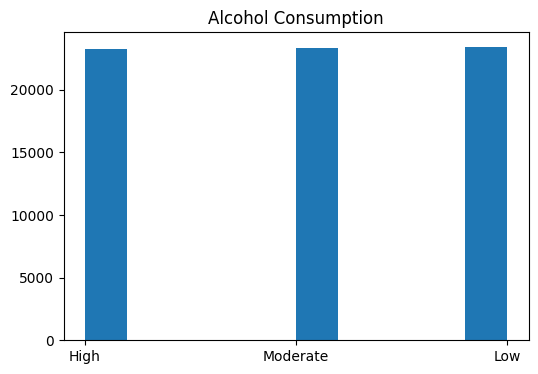

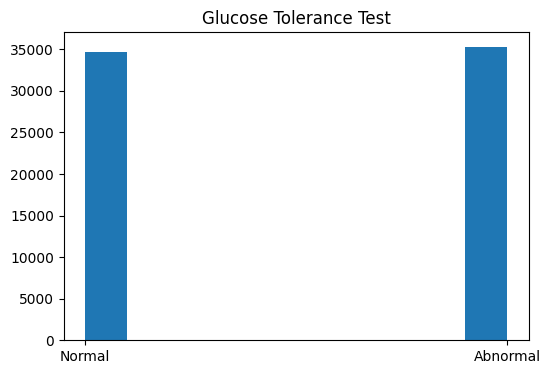

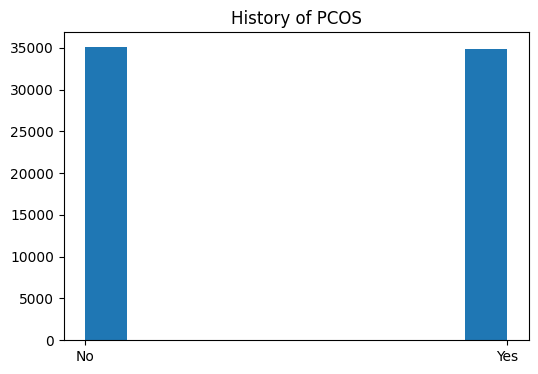

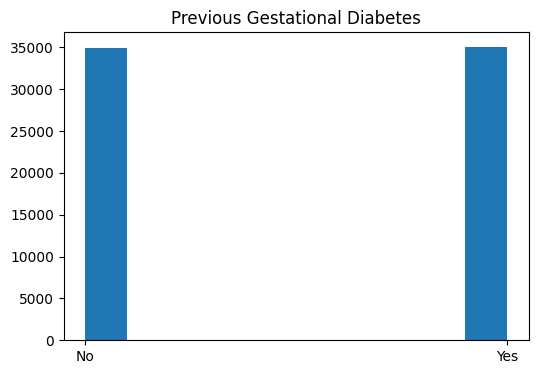

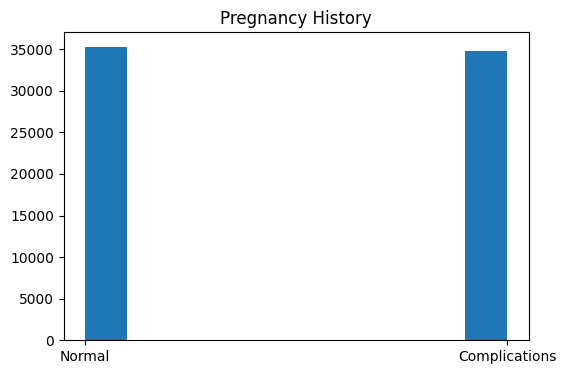

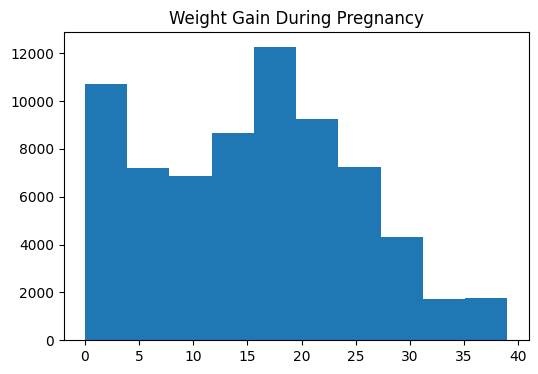

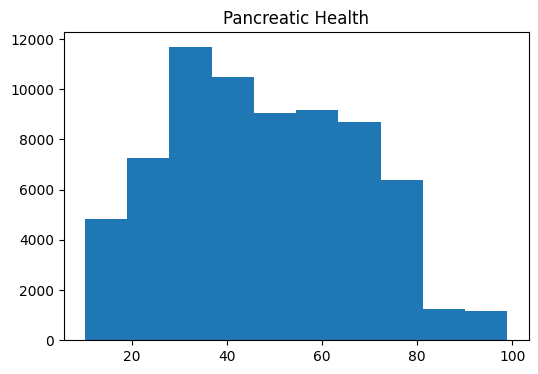

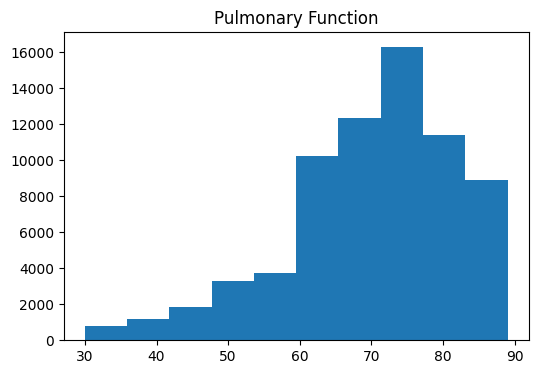

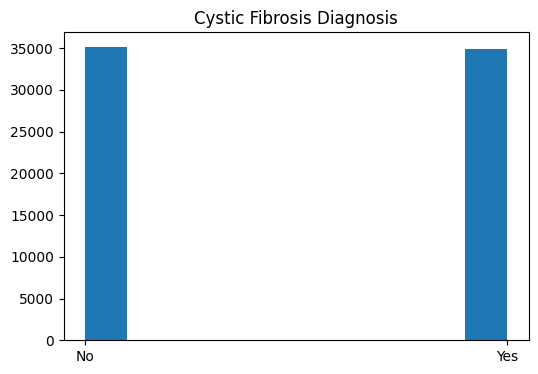

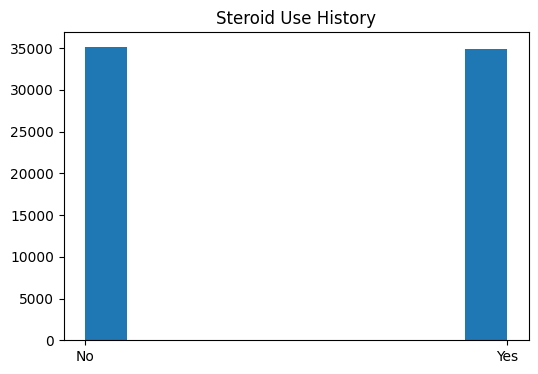

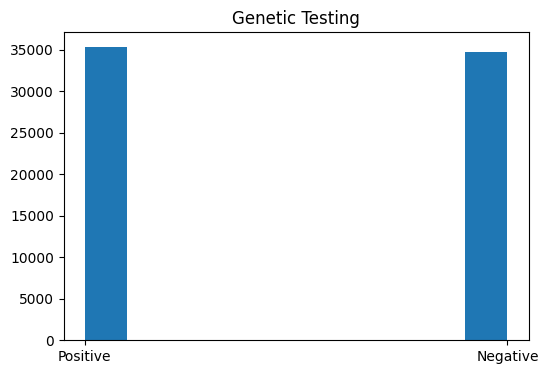

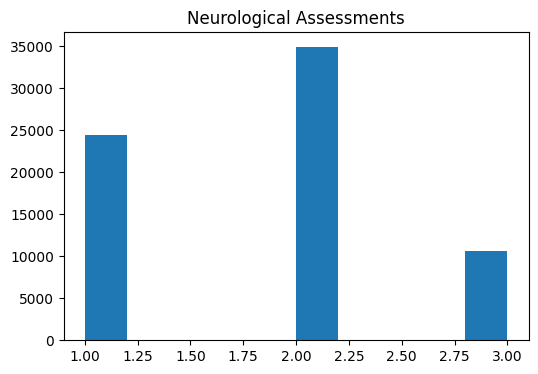

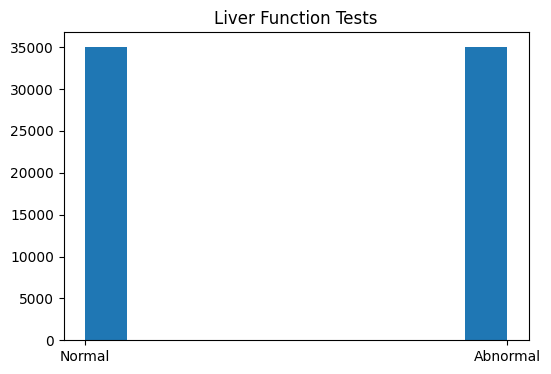

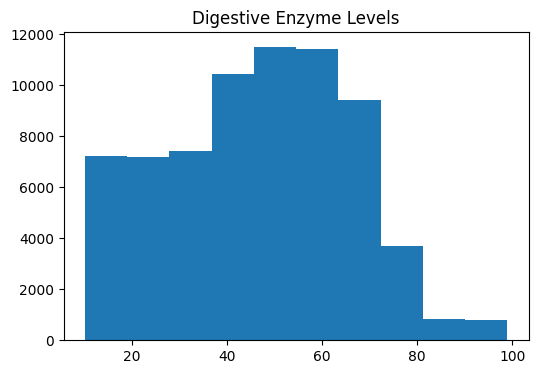

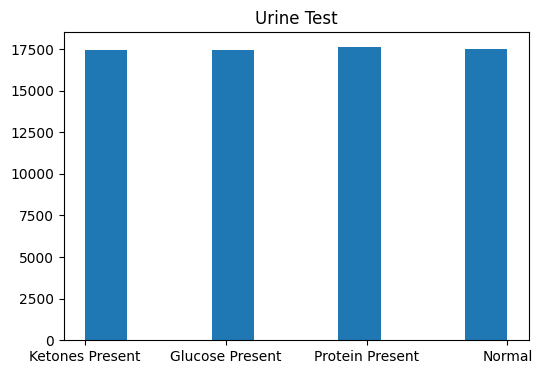

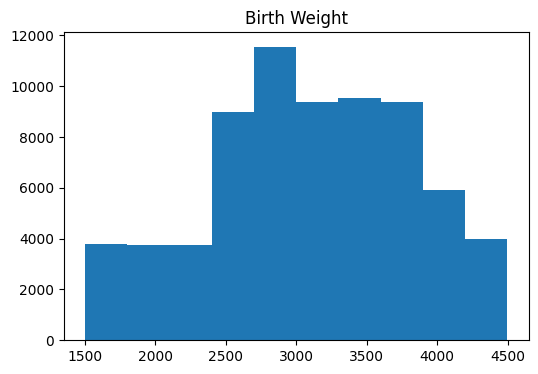

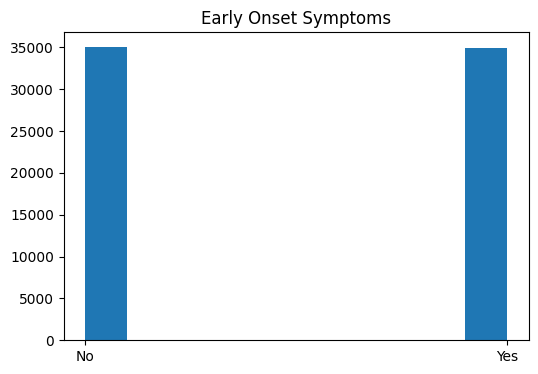

<Figure size 640x480 with 0 Axes>

In [203]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col])
    plt.title(col)
    plt.show()
plt.tight_layout()

<Axes: >

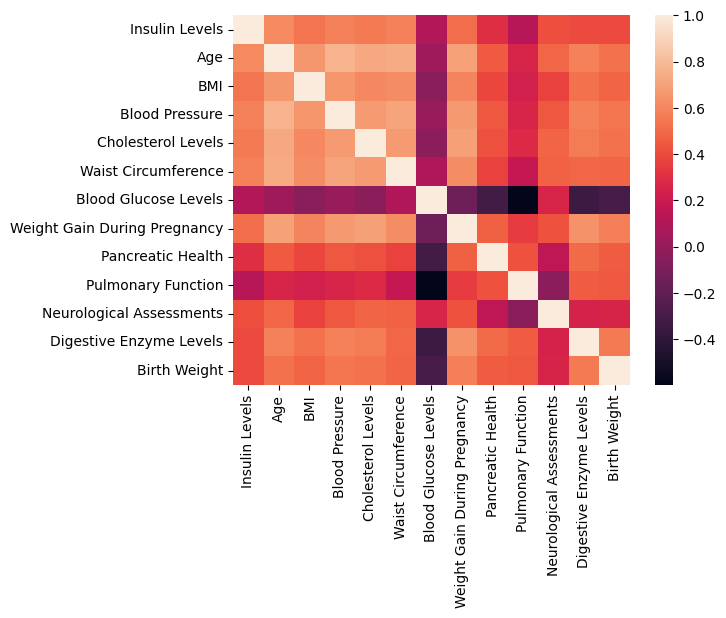

In [204]:
sns.heatmap(data.select_dtypes('int').corr())

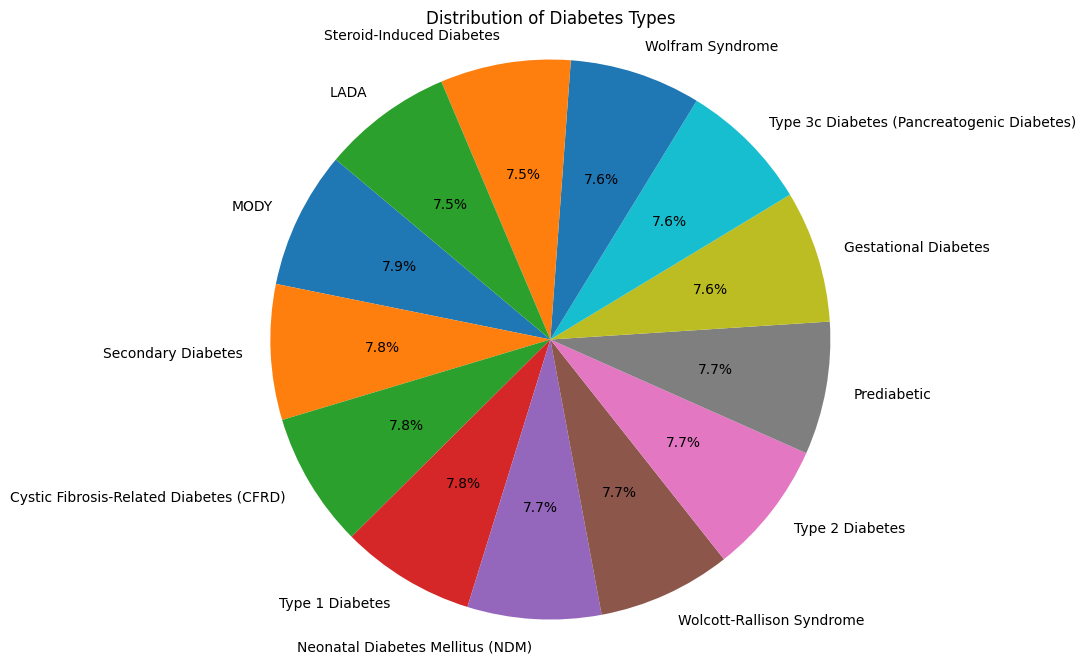

In [205]:
conditions = [
    "MODY", "Secondary Diabetes", "Cystic Fibrosis-Related Diabetes (CFRD)",
    "Type 1 Diabetes", "Neonatal Diabetes Mellitus (NDM)", "Wolcott-Rallison Syndrome",
    "Type 2 Diabetes", "Prediabetic", "Gestational Diabetes", "Type 3c Diabetes (Pancreatogenic Diabetes)",
    "Wolfram Syndrome", "Steroid-Induced Diabetes", "LADA"
]
counts = [
    5553, 5479, 5464, 5446, 5408, 5400, 5397, 5376, 5344, 5320, 5315, 5275, 5270
]

# Creating the pie chart
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=conditions, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Diabetes Types")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

## Encoding
Our dataset mostly comprises of categorical features which make calculations and interpretations very difficult.  
Hence we use label encoding to map them to numerical features accordingly.

In [206]:
from sklearn.preprocessing import LabelEncoder
le_label = LabelEncoder()
data['Target']=le_label.fit_transform(data['Target'])
data["Target"].unique()

array([ 7,  4,  5,  8, 12,  2,  9, 11,  6, 10,  1,  0,  3])

In [207]:
data.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,4,Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,5,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,8,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,12,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [208]:
data["Target"].value_counts()

Target
3     5553
6     5479
0     5464
8     5446
4     5408
11    5400
9     5397
5     5376
1     5344
10    5320
12    5315
7     5275
2     5223
Name: count, dtype: int64

In [209]:
data['Genetic Markers']=le_label.fit_transform(data['Genetic Markers'])
data["Genetic Markers"].unique()

array([1, 0])

In [210]:
data['Autoantibodies']=le_label.fit_transform(data['Autoantibodies'])
data['Family History']=le_label.fit_transform(data['Family History'])
data['Environmental Factors']=le_label.fit_transform(data['Environmental Factors'])
data['Physical Activity']=le_label.fit_transform(data['Physical Activity'])
data['Dietary Habits']=le_label.fit_transform(data['Dietary Habits'])
data['Ethnicity']=le_label.fit_transform(data['Ethnicity'])
data['Socioeconomic Factors']=le_label.fit_transform(data['Socioeconomic Factors'])
data['Smoking Status']=le_label.fit_transform(data['Smoking Status'])
data['Alcohol Consumption']=le_label.fit_transform(data['Alcohol Consumption'])
data['Glucose Tolerance Test']=le_label.fit_transform(data['Glucose Tolerance Test'])
data['History of PCOS']=le_label.fit_transform(data['History of PCOS'])
data['Previous Gestational Diabetes']=le_label.fit_transform(data['Previous Gestational Diabetes'])
data['Pregnancy History']=le_label.fit_transform(data['Pregnancy History'])
data['Cystic Fibrosis Diagnosis']=le_label.fit_transform(data['Cystic Fibrosis Diagnosis'])
data['Steroid Use History']=le_label.fit_transform(data['Steroid Use History'])
data['Genetic Testing']=le_label.fit_transform(data['Genetic Testing'])
data['Liver Function Tests']=le_label.fit_transform(data['Liver Function Tests'])
data['Urine Test']=le_label.fit_transform(data['Urine Test'])
data['Early Onset Symptoms']=le_label.fit_transform(data['Early Onset Symptoms'])

In [211]:
data.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,1,0,0,1,40,44,38,0,0,...,76,0,0,1,3,1,56,1,2629,0
1,4,1,0,0,1,13,1,17,0,0,...,60,1,0,0,1,1,28,0,1881,1
2,5,1,1,1,1,27,36,24,0,1,...,80,1,0,0,1,0,55,1,3622,1
3,8,0,1,0,1,8,7,16,1,1,...,89,1,0,1,2,0,60,1,3542,0
4,12,0,0,1,1,17,10,17,0,0,...,41,0,0,1,1,1,24,3,1770,0


In [212]:
data["Ethnicity"].value_counts()

Ethnicity
1    35018
0    34982
Name: count, dtype: int64

In [213]:
data.dtypes

Target                           int64
Genetic Markers                  int64
Autoantibodies                   int64
Family History                   int64
Environmental Factors            int64
Insulin Levels                   int64
Age                              int64
BMI                              int64
Physical Activity                int64
Dietary Habits                   int64
Blood Pressure                   int64
Cholesterol Levels               int64
Waist Circumference              int64
Blood Glucose Levels             int64
Ethnicity                        int64
Socioeconomic Factors            int64
Smoking Status                   int64
Alcohol Consumption              int64
Glucose Tolerance Test           int64
History of PCOS                  int64
Previous Gestational Diabetes    int64
Pregnancy History                int64
Weight Gain During Pregnancy     int64
Pancreatic Health                int64
Pulmonary Function               int64
Cystic Fibrosis Diagnosis

In [214]:
data = data.astype(float)

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         70000 non-null  float64
 1   Genetic Markers                70000 non-null  float64
 2   Autoantibodies                 70000 non-null  float64
 3   Family History                 70000 non-null  float64
 4   Environmental Factors          70000 non-null  float64
 5   Insulin Levels                 70000 non-null  float64
 6   Age                            70000 non-null  float64
 7   BMI                            70000 non-null  float64
 8   Physical Activity              70000 non-null  float64
 9   Dietary Habits                 70000 non-null  float64
 10  Blood Pressure                 70000 non-null  float64
 11  Cholesterol Levels             70000 non-null  float64
 12  Waist Circumference            70000 non-null 

## Developing the Model

In [216]:
# Making the features(X) and target(y) variables.
X = data.drop("Target", axis=1)  # Features
y = data["Target"] #Target

In [217]:
# Standard Train-Test-Split
%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 μs


In [218]:
# Initialize Random Forest Classifier Model
%time
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.34 μs


In [219]:
# Training the model
%time
rfc.fit(X_train, y_train)

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 5.01 μs


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remov

RandomForestClassifier(class_weight='balanced', random_state=42)

In [220]:
# Make predictions
%time
y_pred = rfc.predict(X_test)
y_pred

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 8.11 μs


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([2., 9., 8., ..., 4., 1., 2.])

In [221]:
# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 993   57   10   21    0    4    0    0    7    1    0    0    0]
 [   8  999   19   15    0   24    0    0    4    0    0    0    0]
 [   1   53  976    0    0   14    0    0    0    0    0    0    0]
 [   0    0    0  924    0    0    0    0  187    0    0    0    0]
 [   0    0    0    0 1082    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1075    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0  855   84    0   52  104    0    0]
 [   0    1    1    0    0    0   24  880    0   30  119    0    0]
 [   0    0    0    0    0    0    0    0 1089    0    0    0    0]
 [   0    0    1    0    0    0  188  105    0  762   23    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1064    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  899  181]
 [   0    0    0    0    0    0    0    0    0    0    0   23 1040]]

Classification Report:
               precision    recall  f1-score   support

         0.0    

In [222]:
importances = rfc.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nTop Features:\n", feature_importances.head(10))


Top Features:
                          Feature  Importance
5                            Age    0.140469
12          Blood Glucose Levels    0.130344
21  Weight Gain During Pregnancy    0.086450
9                 Blood Pressure    0.082945
29       Digestive Enzyme Levels    0.081986
6                            BMI    0.077039
11           Waist Circumference    0.071871
4                 Insulin Levels    0.064929
10            Cholesterol Levels    0.058087
23            Pulmonary Function    0.051971


In [223]:
data.iloc[0]

Target                              7.0
Genetic Markers                     1.0
Autoantibodies                      0.0
Family History                      0.0
Environmental Factors               1.0
Insulin Levels                     40.0
Age                                44.0
BMI                                38.0
Physical Activity                   0.0
Dietary Habits                      0.0
Blood Pressure                    124.0
Cholesterol Levels                201.0
Waist Circumference                50.0
Blood Glucose Levels              168.0
Ethnicity                           1.0
Socioeconomic Factors               2.0
Smoking Status                      1.0
Alcohol Consumption                 0.0
Glucose Tolerance Test              1.0
History of PCOS                     0.0
Previous Gestational Diabetes       0.0
Pregnancy History                   1.0
Weight Gain During Pregnancy       18.0
Pancreatic Health                  36.0
Pulmonary Function                 76.0


## Testing the model on real-world data in interactive mode

In [224]:
# Example: Real-time user input
patient_data = {
    'Genetic Markers': 0.0,
    'Autoantibodies': 1.0,
    'Family History': 1.0,
    'Environmental Factors': 0.0,
    'Insulin Levels': 30.0,
    'Age': 20.0,
    'BMI': 18.0,
    'Physical Activity': 1.0,
    'Dietary Habits': 1.0,
    'Blood Pressure': 110.0,
    'Cholesterol Levels': 80.0,
    'Waist Circumference': 28.0,
    'Blood Glucose Levels': 80.0,
    'Ethnicity': 0.0,
    'Socioeconomic Factors': 1.0,
    'Smoking Status': 0.0,
    'Alcohol Consumption': 1.0,
    'Glucose Tolerance Test': 1.0,
    'History of PCOS': 0.0,
    'Previous Gestational Diabetes': 0.0,
    'Pregnancy History': 0.0,
    'Weight Gain During Pregnancy': 0.0,
    'Pancreatic Health': 20.0,
    'Pulmonary Function': 53.0,
    'Cystic Fibrosis Diagnosis': 1.0,
    'Steroid Use History': 1.0,
    'Genetic Testing': 0.0,
    'Neurological Assessments': 0.0,
    'Liver Function Tests': 0.0,
    'Digestive Enzyme Levels': 26.0,
    'Urine Test': 0.0,
    'Birth Weight': 1353.0,
    'Early Onset Symptoms': 1.0
}

# Convert the input dictionary to a DataFrame
patient_df = pd.DataFrame([patient_data])

# Make a prediction
prediction = rfc.predict(patient_df)

# Map prediction to diabetes type
diabetes_types = { 3: 'MODY', 6: 'Secondary Diabetes', 0: 'Cystic Fibrosis-Related Diabetes (CFRD)', 8: 'Type 1 Diabetes', 
                  4: 'Neonatal Diabetes Mellitus (NDM)', 11: 'Wolcott-Rallison Syndrome', 9: 'Type 2 Diabetes', 5: 'Prediabetic',
                  1: 'Gestational Diabetes', 10: 'Type 3c Diabetes (Pancreatogenic Diabetes)', 12: 'Wolfram Syndrome', 7: 'Steroid-Induced Diabetes',
                  2: 'LADA' }
predicted_diabetes_type = diabetes_types.get(prediction[0], 'Unknown')

# Display the result
print(f"The patient is classified as: {predicted_diabetes_type}.")


The patient is classified as: Wolcott-Rallison Syndrome.


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [225]:
data["Physical Activity"].value_counts()

Physical Activity
2.0    23427
1.0    23348
0.0    23225
Name: count, dtype: int64

In [226]:
data["Urine Test"].value_counts()

Urine Test
3.0    17628
2.0    17528
0.0    17422
1.0    17422
Name: count, dtype: int64

In [227]:
from joblib import dump
dump(rfc, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [228]:
end_time = time.time()
print(f"Total Wall Time: {end_time - start_time:.2f} seconds")

Total Wall Time: 6.61 seconds


In [229]:
# Terminated